# Exercise 4: More on logistic regression and its application
## (1) Implement Newton's method for logistic regression

These files contain the inputs (x(i) ∈ R^2) and outputs (y(i) ∈ {−1, 1}), respectively for a
binary classification problem, with one training example per row. Implement Newton’s
method for optimizing J(θ), and apply it to fit a logistic regression model to the data.
Initialize Newton’s method with θ = 0 (the vector of all zeros). What are the coefficients θ
resulting from your fit? (Remember to include the intercept term.)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df_X = pd.read_csv('./Data/logistic_x.txt', sep='\ +', header=None, engine='python')
ys = pd.read_csv('./Data/logistic_y.txt', sep='\ +', header=None, engine='python')
ys = ys.astype(int)

In [3]:
df_X['label'] = ys[0].values

Quick look at the data

<AxesSubplot:xlabel='0', ylabel='1'>

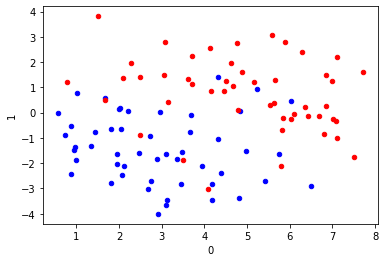

In [4]:
ax = plt.axes()

df_X.query('label == -1').plot.scatter(x=0, y=1, ax=ax, color='blue')
df_X.query('label == 1').plot.scatter(x=0, y=1, ax=ax, color='red')

Newton's method addresses getting to $f(\theta) = 0$, and minimizing $J(\theta)$ means getting $\frac{\partial J}{\partial \theta}$ to 0. There after applying Newton's method, extending it to multidimensional setting (Newton-Raphson method), the update rule becomes:

\begin{align*}
\theta &:= \theta - \frac{\partial J(\theta) / \partial \theta} {H} \\
       &:= \theta - \frac{\nabla_{\theta} J(\theta)} {H} \\
       &:= \theta - H^{-1} \nabla_{\theta} J(\theta)
\end{align*}

Note, the $H$ in the denominator may not be a valid mathematical expression as it is actually an inverse operation.

In [5]:
Xs = df_X[[0, 1]].values

In [6]:
Xs.shape

(99, 2)

In [7]:
# adding a columns of ones for the intercept terms, and also use column vectors
Xs = np.hstack([np.ones((Xs.shape[0], 1)), Xs])
ys = df_X['label'].values
all_thetas = [] # collect for demonstration purpose


Copied equations from above:

$$z^{(k)} = y^{(k)} \theta^T x^{(k)}$$

$$g(z^{(k)}) = \frac{1}{1 + e^{-z^{(k)}}}$$

$$
\frac{\partial J}{\partial \theta_i} 
 = \frac{1}{m} \sum_{k=1}^{m} \big(g(z^{(k)}) - 1\big) y^{(k)} x_i^{(k)}
$$

$$
H_{ij} = \frac{1}{m} \sum_{k=1}^{m} g(z^{(k)})\big(1 - g(z^{(k)})\big) x_i^{(k)} x_j^{(k)}
$$


In [14]:
def NewtonMethod(X,Y):
# TODO: implement this function. Hint, the start difference should be set as 1e9, and the ending difference threshold should be 1e-6.
    m, d = X.shape
    Y = Y.reshape(-1, 1)
    all_thetas = []
    theta = np.zeros((d, 1))
    err = 1e9
    while err > 1e-6:
        z = Y * (X.dot(theta))
        g_z = 1 / (1 + np.exp(-z))
        grad = np.sum((g_z - 1) * Y * X, axis=0).reshape(-1, 1) / m
        H = (g_z * X).T.dot((1 - g_z) * X) / m
        theta -= np.linalg.inv(H).dot(grad)
        if len(all_thetas) > 0:
            err = np.linalg.norm(theta - all_thetas[-1])
        else:
            err = np.linalg.norm(theta)
        all_thetas.append(np.copy(theta))
    return all_thetas

We have provided you with ploting code below. If your implementation is correct, the result that you plotted will be the same as the figure below.

![](Figures/Newton.png)



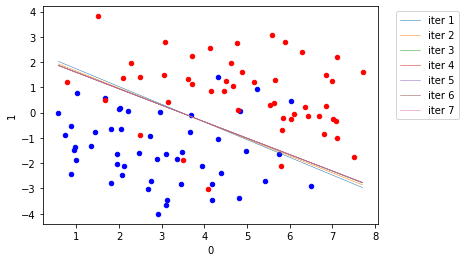

In [15]:
all_thetas = NewtonMethod(Xs,ys)
ax = plt.axes()

df_X.query('label == -1').plot.scatter(x=0, y=1, ax=ax, color='blue')
df_X.query('label == 1').plot.scatter(x=0, y=1, ax=ax, color='red')

_xs = np.array([np.min(Xs[:,1]), np.max(Xs[:,1])])
for k, theta in enumerate(all_thetas):
    _ys = (theta[0] + theta[1] * _xs) / (- theta[2])
    plt.plot(_xs, _ys, label='iter {0}'.format(k + 1), lw=0.5)
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")